# About Dataset

The dataset contains EEG signals from 11 subjects with labels of alert and drowsy. It can be opened with Matlab. We extracted the data for our own research purpose from another public dataset:

Cao, Z., et al., Multi-channel EEG recordings during a sustained-attention driving task. Scientific data, 2019. 6(1): p. 1-8.

If you find the dataset useful, please give credits to their works.

The details on how the data were extracted are described in our paper:

"Jian Cui, Zirui Lan, Yisi Liu, Ruilin Li, Fan Li, Olga Sourina, Wolfgang Müller-Wittig, A Compact and Interpretable Convolutional Neural Network for Cross-Subject Driver Drowsiness Detection from Single-Channel EEG, Methods, 2021, ISSN 1046-2023, https://doi.org/10.1016/j.ymeth.2021.04.017."

The codes of the paper above are accessible from:

https://github.com/cuijiancorbin/A-Compact-and-Interpretable-Convolutional-Neural-Network-for-Single-Channel-EEG

The data file contains 3 variables and they are EEGsample, substate and subindex.

"EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels.
"subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample.
"substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

The unbalanced version of this dataset is accessible from:
https://figshare.com/articles/dataset/EEG_driver_drowsiness_dataset_unbalanced_/16586957

# Importing Libraires 

In [1]:
import scipy.io
import numpy as np
import pandas as pd
from scipy.io import loadmat
from tabulate import tabulate
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
file_path = 'EEG driver drowsiness dataset.mat'
mat_data = scipy.io.loadmat(file_path)

In [3]:
print(mat_data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec 12 16:15:31 2019', '__version__': '1.0', '__globals__': [], 'EEGsample': array([[[ 4.08097622e+00,  5.36373657e+00,  2.16892286e+00, ...,
         -2.43467111e+00, -1.08033326e+01, -4.06570287e+00],
        [ 3.78602291e+00,  6.18806022e+00,  1.72710622e+00, ...,
         -2.23788269e+00, -1.08040545e+01, -3.16985550e+00],
        [ 8.34680437e+00,  8.69160090e+00, -1.09056499e-02, ...,
          2.30521997e+00, -1.33921422e+01, -5.27739673e+00],
        ...,
        [ 1.52884814e+00,  7.93795880e-01, -1.45126572e+00, ...,
         -1.22710349e+00, -5.26310889e+00, -1.22684549e+00],
        [-1.19949821e+00, -1.54496214e+00, -4.31985930e+00, ...,
         -5.32550694e+00, -5.48814272e+00, -1.57636907e+00],
        [ 1.59400945e+00,  1.90051435e+00, -4.64426331e+00, ...,
         -3.48251971e+00, -2.09547756e+00,  4.01980667e+00]],

       [[ 5.10435476e+00,  2.66309990e-01,  3.92736106e+00, ...,
         -2.43

# Exploratory Data Analysis

In [4]:
# Inspecting the keys and structure of the loaded data
mat_data.keys(), {key: type(mat_data[key]) for key in mat_data.keys()}

(dict_keys(['__header__', '__version__', '__globals__', 'EEGsample', 'subindex', 'substate']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'EEGsample': numpy.ndarray,
  'subindex': numpy.ndarray,
  'substate': numpy.ndarray})

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Assigning Variables</h2>
    
</div>


In [5]:
eeg_samples = mat_data['EEGsample']
subindex = mat_data['subindex']
substates = mat_data['substate']

### Calculate the duration of each sample in seconds

EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels. "subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample. "substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

In [6]:
# Calculate the duration of each sample in seconds
sampling_rate = 128  # Hz

num_samples, num_channels, num_time_points = eeg_samples.shape
sample_duration = num_time_points / sampling_rate

### Check for missing values

In [7]:
missing_values = np.isnan(eeg_samples).sum()
if missing_values == 0:
    print("No missing values in the EEG data.")
else:
    print("Number of missing values:", missing_values)

No missing values in the EEG data.


In [8]:
print("Number of subjects:", len(np.unique(subindex)))
print("EEGsample shape:", eeg_samples.shape)
print("Number of Samples:", num_samples)
print("Number of Channels:", num_channels)
print("Number of Time Points:", num_time_points)
print("Sample Duration (seconds):", sample_duration)

unique_labels, label_counts = np.unique(substates, return_counts=True)
print("Unique labels:", unique_labels)
print("Label counts:", label_counts)

Number of subjects: 11
EEGsample shape: (2022, 30, 384)
Number of Samples: 2022
Number of Channels: 30
Number of Time Points: 384
Sample Duration (seconds): 3.0
Unique labels: [0 1]
Label counts: [1011 1011]


#### The initial exploration of the EEG dataset reveals the following details:

#### EEG Samples (EEGsample):

  * The dataset contains 2022 EEG samples.
  * Each EEG sample is from 30 channels.
  * Each channel has 384 data points, corresponding to a 3-second EEG recording at a sampling rate of 128Hz.

#### Subject States (substate):

  * There are two unique states: 0 representing the alert state and 1 representing the drowsy state.
  * Each state has 1011 samples, indicating a balanced dataset with respect to the two states.

#### Subject Indexes (subindex):

  * There are 11 unique subjects in the dataset (labeled 1 to 11).
  * The distribution of samples across subjects varies, ranging from a minimum of 102 samples to a maximum of 314 samples per subject.

## State-specific Analysis: 'Alert' and 'Drowsy'

In [9]:
substates_flat = substates.flatten()

In [10]:
# Calculating means and standard deviations for each channel in both states

#Alert States
mean_alert = np.mean(eeg_samples[substates_flat == 0], axis=(0, 2))
std_alert = np.std(eeg_samples[substates_flat == 0], axis=(0, 2))

#Drowsy States
mean_drowsy = np.mean(eeg_samples[substates_flat == 1], axis=(0, 2))
std_drowsy = np.std(eeg_samples[substates_flat == 1], axis=(0, 2))

In [11]:
# Creating a DataFrame for easy viewing
stats_df = pd.DataFrame({
    'Channel': range(1, 31),
    'Mean_Alert': mean_alert,
    'Std_Alert': std_alert,
    'Mean_Drowsy': mean_drowsy,
    'Std_Drowsy': std_drowsy
})

In [12]:
stats_df  

,Channel,Mean_Alert,Std_Alert,Mean_Drowsy,Std_Drowsy
0,1,0.120450,17.630071,-0.163686,10.802148
1,2,0.082160,17.209800,-0.163763,12.170468
2,3,0.052289,9.635932,-0.061430,9.706984
3,4,0.002035,30.798487,-0.113082,11.617223
4,5,0.022715,9.642534,-0.159155,11.707889
5,6,0.021788,26.476227,-0.154311,17.197473
6,7,0.019232,12.678096,-0.126242,9.635353
7,8,0.046900,8.752803,-0.070030,9.094665
8,9,0.023307,9.758593,-0.130595,11.230886
9,10,0.017935,9.891951,-0.138523,12.140691


## EEG Channel Statistics Across Subjects and Timepoints

In [13]:
# Compute basic statistics for each EEG channel
mean_values = np.mean(eeg_samples, axis=(0, 2))  # Compute mean along subjects and timepoints
std_values = np.std(eeg_samples, axis=(0, 2))    # Compute standard deviation along subjects and timepoints
min_values = np.min(eeg_samples, axis=(0, 2))    # Compute minimum along subjects and timepoints
max_values = np.max(eeg_samples, axis=(0, 2))    # Compute maximum along subjects and timepoints

# Create a list of dictionaries for each channel's statistics
channel_stats = [
    {
        "Channel": channel_index + 1,
        "Mean": f"{mean_values[channel_index]:.4f}",
        "Std Dev": f"{std_values[channel_index]:.4f}",
        "Min": f"{min_values[channel_index]:.4f}",
        "Max": f"{max_values[channel_index]:.4f}"
    }
    for channel_index in range(num_channels)
]

In [14]:
# Printing the table
print("Basic Statistics for EEG Channels")
print(tabulate(channel_stats, headers="keys", tablefmt="grid"))

Basic Statistics for EEG Channels
+-----------+---------+-----------+-----------+----------+
|   Channel |    Mean |   Std Dev |       Min |      Max |
+===========+=========+===========+===========+==========+
|         1 | -0.0216 |   14.621  |  -573.236 |  871.908 |
+-----------+---------+-----------+-----------+----------+
|         2 | -0.0408 |   14.9052 | -1299.32  |  911.153 |
+-----------+---------+-----------+-----------+----------+
|         3 | -0.0046 |    9.6717 |  -208.161 |  243.286 |
+-----------+---------+-----------+-----------+----------+
|         4 | -0.0555 |   23.2757 | -1302.31  | 1795.54  |
+-----------+---------+-----------+-----------+----------+
|         5 | -0.0682 |   10.7254 |  -259.186 |  157.868 |
+-----------+---------+-----------+-----------+----------+
|         6 | -0.0663 |   22.3244 | -1914.6   | 1294.24  |
+-----------+---------+-----------+-----------+----------+
|         7 | -0.0535 |   11.2602 |  -496.507 |  754.21  |
+-----------+---------

# Segregating the data into alert and drowsy states

In [15]:
import scipy.io

In [16]:
eeg_samples = mat_data['EEGsample']
subindex = mat_data['subindex']
substates = mat_data['substate']

In [17]:
# Segregate the data into alert and drowsy states
alert_data = mat_data['EEGsample'][mat_data['substate'][:, 0] == 0, :]
drowsy_data = mat_data['EEGsample'][mat_data['substate'][:, 0] == 1, :]

In [18]:
# Save the segregated data as new datasets
scipy.io.savemat('alert_data.mat', {'EEGsample': alert_data})
scipy.io.savemat('drowsy_data.mat', {'EEGsample': drowsy_data})

# Data Manipulation - Alert State

In [19]:
# Load the alert data
alert_data = scipy.io.loadmat('alert_data.mat')

# Transpose the EEGsample for each sample
transposed_alert_data = np.transpose(alert_data['EEGsample'], (0, 2, 1))

transposed_alert_data.shape

(1011, 384, 30)

In [20]:
# Concatenate all the samples together
Manipulated_Alert_Data = np.concatenate(transposed_alert_data, axis=0)

Manipulated_Alert_Data.shape

(388224, 30)

In [21]:
# Create a new dataframe with the concatenated EEG values
Manipulated_Alert_Data = pd.DataFrame(Manipulated_Alert_Data)

In [22]:
Manipulated_Alert_Data.columns = ['EEG {}'.format(i) for i in range(1, 31)]

Manipulated_Alert_Data['substate'] = 0

In [23]:
Manipulated_Alert_Data_shape = Manipulated_Alert_Data.shape
print(Manipulated_Alert_Data_shape)

(388224, 31)


In [24]:
Manipulated_Alert_Data

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10,...,EEG 22,EEG 23,EEG 24,EEG 25,EEG 26,EEG 27,EEG 28,EEG 29,EEG 30,substate
0,4.080976,3.786023,8.346804,6.719097,8.357521,8.916676,6.862104,9.614278,8.955653,11.076102,...,4.477457,1.590643,8.856600,6.898189,3.846108,1.618809,1.528848,-1.199498,1.594009,0
1,5.363737,6.188060,8.691601,6.594982,7.950093,8.835506,7.987136,8.394441,7.126653,8.356511,...,2.415757,1.918520,7.423708,3.755487,1.427838,-0.657721,0.793796,-1.544962,1.900514,0
2,2.168923,1.727106,-0.010906,10.583628,2.440252,1.746089,1.159202,-1.002561,7.059705,1.720240,...,-4.692833,4.261903,3.151329,-1.637562,-5.816451,-8.913891,-1.451266,-4.319859,-4.644263,0
3,6.682761,4.633752,2.093427,16.253235,6.105603,3.943814,4.016592,2.393903,17.343024,6.441727,...,0.839859,2.543160,7.499411,4.182199,-0.059025,-0.736035,4.434387,3.438641,1.207515,0
4,9.795314,8.723788,10.936554,8.182007,8.306618,7.103265,7.980278,12.270826,9.309045,6.750704,...,2.970653,-0.216052,5.413562,5.600711,2.837383,4.172009,0.202442,1.743480,3.413565,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388219,8.233965,0.275736,6.446871,5.908036,9.747110,11.439683,-1.685268,5.394103,5.898229,12.230832,...,-6.909897,-8.072416,-0.579174,5.365872,-2.507618,-7.071795,-5.722929,2.618950,-3.075700,0
388220,7.406664,9.878674,-3.062066,9.699165,12.825886,16.227294,11.658202,0.792909,8.312962,14.986136,...,-4.750323,-9.749710,0.661105,7.605404,0.084582,-4.264237,-3.538781,3.539202,-0.909379,0
388221,13.849187,15.022659,-0.428879,12.096121,18.726862,20.367732,21.341497,-0.920176,11.466241,19.145924,...,2.819010,-14.607244,1.367658,10.402462,6.190984,3.495143,-5.398682,3.006524,-0.195928,0
388222,16.960690,11.183629,8.472685,8.712444,17.208050,19.493375,19.953374,2.115628,10.656352,18.752221,...,9.265103,-15.256238,-1.057022,8.016603,8.461495,8.418237,-9.056400,0.705703,-0.641096,0


In [25]:
Manipulated_Alert_Data.describe()

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10,...,EEG 22,EEG 23,EEG 24,EEG 25,EEG 26,EEG 27,EEG 28,EEG 29,EEG 30,substate
count,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,...,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.0
mean,0.120450,0.082160,0.052289,0.002035,0.022715,0.021788,0.019232,0.046900,0.023307,0.017935,...,0.021766,0.007225,-0.003592,0.019598,0.010883,0.033979,0.010209,-0.011278,0.016158,0.0
std,17.630093,17.209822,9.635944,30.798527,9.642547,26.476261,12.678112,8.752815,9.758606,9.891964,...,8.139659,7.684464,8.780677,9.051305,8.877557,7.612380,8.213531,8.012668,8.402200,0.0
min,-573.236473,-1299.322323,-179.743368,-1302.310821,-259.186417,-1914.601674,-496.506648,-257.126168,-264.446044,-170.110365,...,-412.436568,-164.084974,-182.130863,-160.504457,-188.102204,-300.202835,-155.316775,-164.679904,-170.630668,0.0
25%,-4.776408,-5.200087,-4.309381,-5.210375,-5.136774,-5.298737,-4.533854,-3.814357,-5.077397,-5.446187,...,-3.618430,-3.631967,-4.483550,-4.728144,-4.541708,-3.618739,-3.935085,-3.812024,-3.973197,0.0
50%,-0.075639,-0.078809,0.021210,-0.007062,-0.025080,-0.004596,0.032909,0.000847,0.002038,-0.015818,...,0.072676,0.064908,0.021311,0.014776,0.011861,0.067332,0.070167,0.027562,0.061650,0.0
75%,4.674139,5.061314,4.318260,5.122598,5.058932,5.269095,4.578348,3.898470,5.029046,5.397253,...,3.720945,3.728646,4.505347,4.764787,4.597949,3.740409,4.070610,3.884409,4.121255,0.0
max,871.907755,911.153120,243.285973,1795.543933,157.868435,1116.638265,754.210204,178.262784,358.262495,172.711611,...,169.197791,221.973860,228.132948,167.531582,191.191891,159.280290,153.842957,148.846683,146.055474,0.0


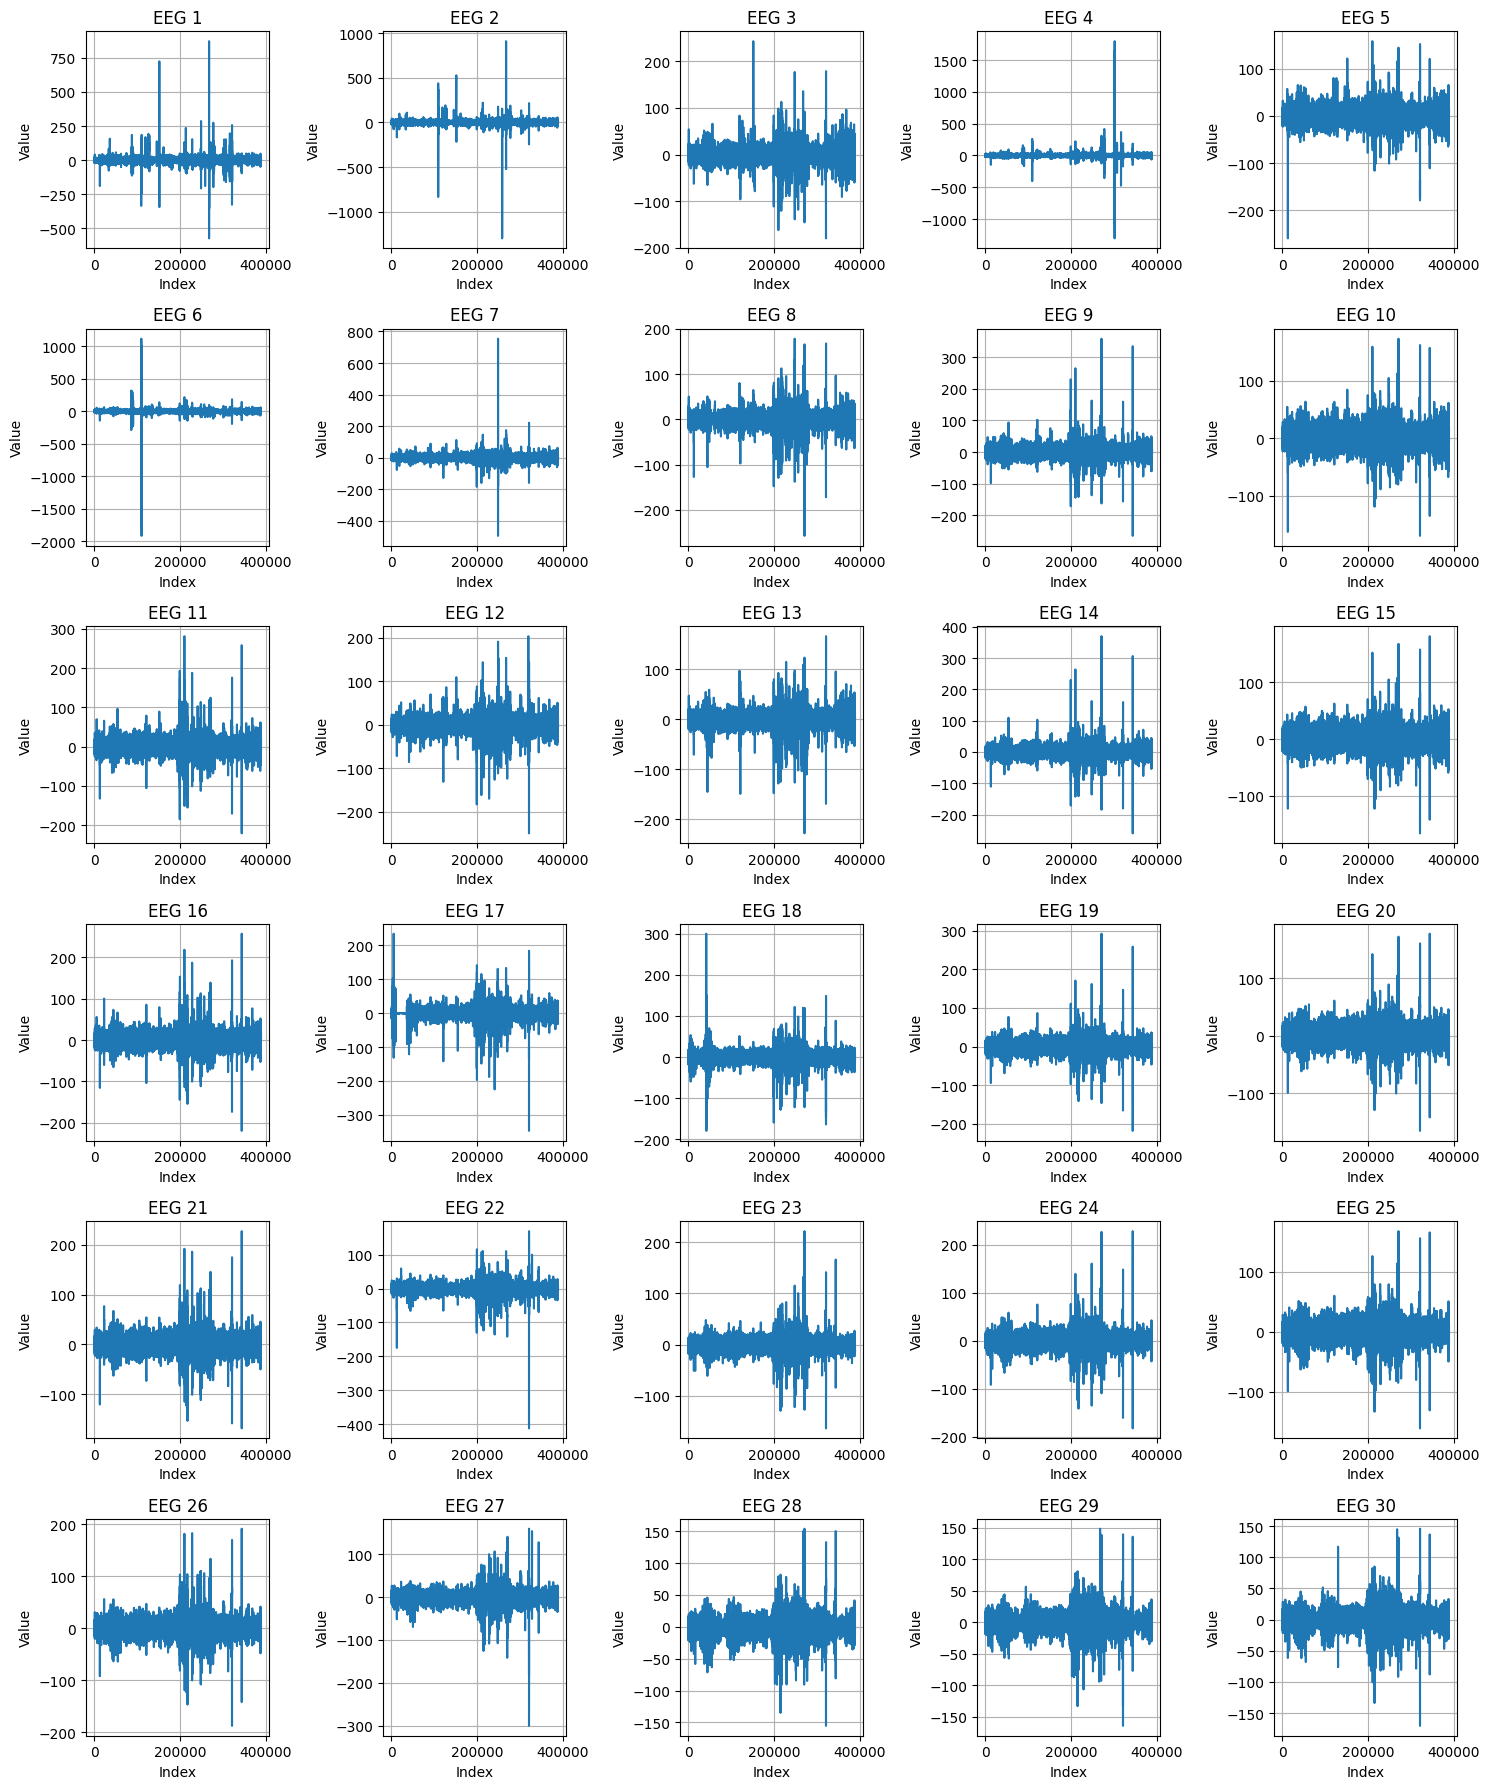

In [26]:
import matplotlib.pyplot as plt

# Assuming Manipulated_Alert_Data is your DataFrame
columns_to_plot = Manipulated_Alert_Data.columns[:-1]  # Exclude the last column ("substate")

# Calculate the number of rows and columns needed
num_columns = 5
num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 3 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    Manipulated_Alert_Data[column].plot(ax=axes[i], grid=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Value')

# Hide the empty subplots in the last row
for j in range(len(columns_to_plot), num_rows * num_columns):
    fig.delaxes(axes[j])

# Adjust layout for better visibility
plt.tight_layout()

# Show the plot
plt.show()


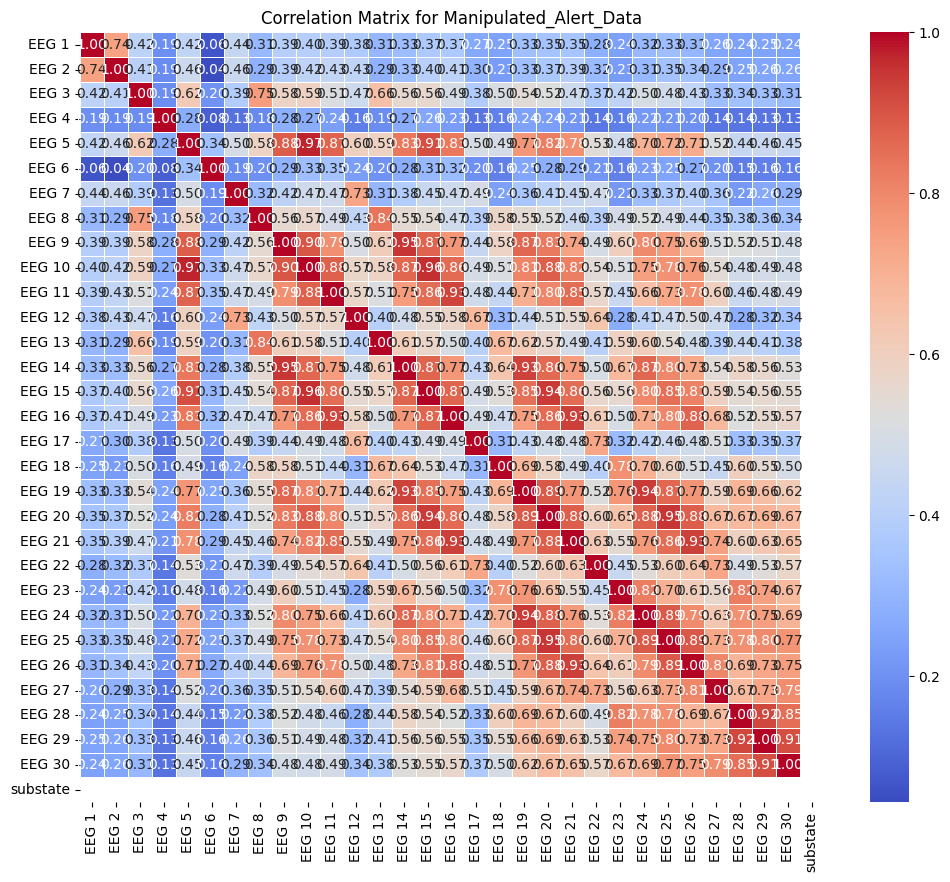

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Manipulated_Alert_Data is your DataFrame
correlation_matrix = Manipulated_Alert_Data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with a color bar side legend
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)

# Set the title and show the plot
plt.title('Correlation Matrix for Manipulated_Alert_Data')
plt.show()


In [28]:
# Assuming Manipulated_Alert_Data is your DataFrame
correlation_with_substate = Manipulated_Alert_Data.corrwith(Manipulated_Alert_Data['substate'])

# Find the most correlated feature
most_correlated_feature = correlation_with_substate.idxmax()
max_correlation_value = correlation_with_substate.max()

print(f"The most correlated feature with respect to 'substate' is '{most_correlated_feature}' with a correlation coefficient of {max_correlation_value:.2f}.")


The most correlated feature with respect to 'substate' is 'nan' with a correlation coefficient of nan.


In [29]:
# Exclude the previously identified most correlated feature
remaining_features = Manipulated_Alert_Data.columns.difference([most_correlated_feature])

# Calculate correlations with respect to 'substate' for the remaining features
remaining_correlations = Manipulated_Alert_Data[remaining_features].corrwith(Manipulated_Alert_Data['substate'])

# Find the other most correlated feature
other_most_correlated_feature = remaining_correlations.idxmax()
other_max_correlation_value = remaining_correlations.max()

print(f"The other most correlated feature with respect to 'substate' is '{other_most_correlated_feature}' with a correlation coefficient of {other_max_correlation_value:.2f}.")


The other most correlated feature with respect to 'substate' is 'nan' with a correlation coefficient of nan.


https://www.kdnuggets.com/2023/06/advanced-feature-selection-techniques-machine-learning-models.html
    
https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
    
https://www.epa.gov/caddis-vol4/exploratory-data-analysis#:~:text=Exploratory%20Data%20Analysis%20(EDA)%20is,step%20in%20any%20data%20analysis.
        
https://www.analyticsvidhya.com/blog/2021/08/exploratory-data-analysis-and-visualization-techniques-in-data-science/        
https://www.machinelearningplus.com/machine-learning/feature-selection/

https://github.com/shap/shap

https://www.tensorflow.org/text/tutorials/transformer

In [30]:
# Save the new dataframe as a CSV file
Manipulated_Alert_Data.to_csv('Manipulated_Alert_Data.csv', index=False)

# Data Manipulation - Drowsy State

In [31]:
# Load the alert data
drowsy_data = scipy.io.loadmat('drowsy_data.mat')

# Transpose the EEGsample for each sample
transposed_drowsy_data = np.transpose(drowsy_data['EEGsample'], (0, 2, 1))

transposed_drowsy_data.shape

(1011, 384, 30)

In [32]:
# Concatenate all the samples together
Manipulated_drowsy_data = np.concatenate(transposed_drowsy_data, axis=0)

Manipulated_drowsy_data.shape

(388224, 30)

In [33]:
# Create a new dataframe with the concatenated EEG values
Manipulated_drowsy_data = pd.DataFrame(Manipulated_drowsy_data)

In [34]:
Manipulated_drowsy_data.columns = ['EEG {}'.format(i) for i in range(1, 31)]

Manipulated_drowsy_data['substate'] = 1

Manipulated_drowsy_data

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10,...,EEG 22,EEG 23,EEG 24,EEG 25,EEG 26,EEG 27,EEG 28,EEG 29,EEG 30,substate
0,-9.340455,-2.581835,0.605112,-1.951353,-1.691814,0.000079,3.330641,-0.191926,-4.416670,-1.147983,...,2.129284,-3.047745,-4.376038,-3.188374,-0.385878,1.875040,-5.343100,-3.923701,-2.074438,1
1,-9.297278,1.208397,1.506896,-2.264259,-0.276102,2.584222,6.163738,1.151379,-4.483509,0.162938,...,5.101435,-6.010214,-4.166642,-2.759660,1.960440,2.900005,-5.235632,-4.409118,-0.922046,1
2,-5.377346,4.373476,1.989039,0.960820,4.204186,7.833417,6.751105,1.460457,-1.914790,4.162968,...,4.944842,-5.937366,-2.171945,1.778525,4.798910,3.802374,-4.404817,-2.675341,1.579044,1
3,-0.387827,6.691171,5.519700,7.556678,9.908533,9.829516,7.316607,5.024432,4.905958,11.028363,...,7.509409,-2.738498,3.898276,9.131125,11.175130,7.386306,-0.541670,2.996915,6.289799,1
4,4.371176,8.625327,7.997311,13.974010,13.865399,12.207135,6.853086,7.709539,11.165707,16.520067,...,9.410449,0.360403,9.101561,13.200414,15.277298,6.949633,-0.142043,4.255927,8.020452,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388219,6.868306,2.037630,10.935329,3.053171,2.061508,-2.051896,-6.980084,6.915801,1.292861,-2.156677,...,0.466622,1.703162,0.489967,-0.037224,-1.715912,1.355944,0.816035,0.522263,-0.399985,1
388220,3.248673,-3.479991,8.520732,-0.933774,-2.160580,-5.932663,-12.832424,4.543766,-2.418177,-6.189452,...,-1.080016,2.258167,-0.767202,-2.633476,-5.121715,-0.736463,0.412399,-0.159130,-2.200928,1
388221,5.805058,2.770440,8.983543,1.738981,-0.541900,-8.541175,-8.517280,3.491680,-1.389771,-5.822860,...,-3.365152,3.624552,0.280940,-3.084484,-4.691478,-3.197477,0.923831,1.341110,-1.338262,1
388222,7.142978,0.775242,9.888220,4.223264,0.790337,-6.479811,-12.121178,4.921120,0.083320,-4.330250,...,-2.798542,4.248466,1.042023,-2.643634,-3.409195,-2.482608,1.644079,1.565844,-0.301095,1


In [35]:
# Save the new dataframe as a CSV file
Manipulated_drowsy_data.to_csv('Manipulated_drowsy_data.csv', index=False)

# Creating new Manipulated EEG Data

In [36]:
# Concatenate them row-wise
Manipulated_EEG_Data = pd.concat([Manipulated_Alert_Data, Manipulated_drowsy_data], ignore_index=True)

Manipulated_EEG_Data = pd.DataFrame(Manipulated_EEG_Data)

Manipulated_EEG_Data

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10,...,EEG 22,EEG 23,EEG 24,EEG 25,EEG 26,EEG 27,EEG 28,EEG 29,EEG 30,substate
0,4.080976,3.786023,8.346804,6.719097,8.357521,8.916676,6.862104,9.614278,8.955653,11.076102,...,4.477457,1.590643,8.856600,6.898189,3.846108,1.618809,1.528848,-1.199498,1.594009,0
1,5.363737,6.188060,8.691601,6.594982,7.950093,8.835506,7.987136,8.394441,7.126653,8.356511,...,2.415757,1.918520,7.423708,3.755487,1.427838,-0.657721,0.793796,-1.544962,1.900514,0
2,2.168923,1.727106,-0.010906,10.583628,2.440252,1.746089,1.159202,-1.002561,7.059705,1.720240,...,-4.692833,4.261903,3.151329,-1.637562,-5.816451,-8.913891,-1.451266,-4.319859,-4.644263,0
3,6.682761,4.633752,2.093427,16.253235,6.105603,3.943814,4.016592,2.393903,17.343024,6.441727,...,0.839859,2.543160,7.499411,4.182199,-0.059025,-0.736035,4.434387,3.438641,1.207515,0
4,9.795314,8.723788,10.936554,8.182007,8.306618,7.103265,7.980278,12.270826,9.309045,6.750704,...,2.970653,-0.216052,5.413562,5.600711,2.837383,4.172009,0.202442,1.743480,3.413565,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776443,6.868306,2.037630,10.935329,3.053171,2.061508,-2.051896,-6.980084,6.915801,1.292861,-2.156677,...,0.466622,1.703162,0.489967,-0.037224,-1.715912,1.355944,0.816035,0.522263,-0.399985,1
776444,3.248673,-3.479991,8.520732,-0.933774,-2.160580,-5.932663,-12.832424,4.543766,-2.418177,-6.189452,...,-1.080016,2.258167,-0.767202,-2.633476,-5.121715,-0.736463,0.412399,-0.159130,-2.200928,1
776445,5.805058,2.770440,8.983543,1.738981,-0.541900,-8.541175,-8.517280,3.491680,-1.389771,-5.822860,...,-3.365152,3.624552,0.280940,-3.084484,-4.691478,-3.197477,0.923831,1.341110,-1.338262,1
776446,7.142978,0.775242,9.888220,4.223264,0.790337,-6.479811,-12.121178,4.921120,0.083320,-4.330250,...,-2.798542,4.248466,1.042023,-2.643634,-3.409195,-2.482608,1.644079,1.565844,-0.301095,1


In [37]:
# Save the new dataframe as a CSV file
Manipulated_EEG_Data.to_csv('Manipulated_EEG_Data.csv', index=False)

# Save as MAT file
scipy.io.savemat('Manipulated_EEG_Data.mat', {'data': Manipulated_EEG_Data.to_numpy()})

In [38]:
Manipulated_EEG_Data.shape

(776448, 31)

In [39]:
Manipulated_EEG_Data["substate"].value_counts()

0    388224
1    388224
Name: substate, dtype: int64

In [40]:
Manipulated_EEG_Data.describe()

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10,...,EEG 22,EEG 23,EEG 24,EEG 25,EEG 26,EEG 27,EEG 28,EEG 29,EEG 30,substate
count,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,...,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.0
mean,-0.021618,-0.040802,-0.004570,-0.055523,-0.068220,-0.066261,-0.053505,-0.011565,-0.053644,-0.060294,...,-0.017509,-0.026515,-0.049814,-0.049215,-0.048120,-0.014090,-0.008072,-0.014516,-0.006941,0.5
std,14.620990,14.905172,9.671696,23.275682,10.725436,22.324431,11.260219,8.925568,10.520814,11.073835,...,7.917922,7.899842,9.362213,9.966547,9.443160,7.901001,9.166132,8.790766,9.168400,0.5
min,-573.236473,-1299.322323,-208.160484,-1302.310821,-259.186417,-1914.601674,-496.506648,-257.126168,-264.446044,-170.110365,...,-412.436568,-164.084974,-182.130863,-160.504457,-188.102204,-300.202835,-155.316775,-164.679904,-170.630668,0.0
25%,-5.350544,-5.673096,-4.867582,-5.980532,-6.031645,-6.040908,-5.034842,-4.501781,-5.895260,-6.349755,...,-3.989990,-4.059459,-5.113621,-5.467732,-5.173702,-4.049075,-4.513315,-4.367126,-4.517431,0.0
50%,-0.156583,-0.151739,-0.057676,-0.110664,-0.136852,-0.094769,-0.051081,-0.000729,-0.110086,-0.133952,...,0.042863,0.049731,-0.028798,-0.051791,-0.036366,0.070813,0.095885,0.052832,0.077466,0.5
75%,5.073020,5.396961,4.732961,5.728880,5.750800,5.840688,4.904647,4.418808,5.661637,6.091726,...,4.026763,4.130372,5.037588,5.361387,5.104271,4.161815,4.700240,4.482325,4.689910,1.0
max,871.907755,911.153120,243.285973,1795.543933,157.868435,1294.240965,754.210204,178.262784,358.262495,172.711611,...,169.197791,221.973860,228.132948,167.531582,191.191891,159.280290,179.167203,149.156242,149.996483,1.0


# 2.3 Class-wise statistical analysis

In [41]:
alert_0 = Manipulated_EEG_Data[Manipulated_EEG_Data["substate"] == 0]
alert_0.describe()

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10,...,EEG 22,EEG 23,EEG 24,EEG 25,EEG 26,EEG 27,EEG 28,EEG 29,EEG 30,substate
count,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,...,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.0
mean,0.120450,0.082160,0.052289,0.002035,0.022715,0.021788,0.019232,0.046900,0.023307,0.017935,...,0.021766,0.007225,-0.003592,0.019598,0.010883,0.033979,0.010209,-0.011278,0.016158,0.0
std,17.630093,17.209822,9.635944,30.798527,9.642547,26.476261,12.678112,8.752815,9.758606,9.891964,...,8.139659,7.684464,8.780677,9.051305,8.877557,7.612380,8.213531,8.012668,8.402200,0.0
min,-573.236473,-1299.322323,-179.743368,-1302.310821,-259.186417,-1914.601674,-496.506648,-257.126168,-264.446044,-170.110365,...,-412.436568,-164.084974,-182.130863,-160.504457,-188.102204,-300.202835,-155.316775,-164.679904,-170.630668,0.0
25%,-4.776408,-5.200087,-4.309381,-5.210375,-5.136774,-5.298737,-4.533854,-3.814357,-5.077397,-5.446187,...,-3.618430,-3.631967,-4.483550,-4.728144,-4.541708,-3.618739,-3.935085,-3.812024,-3.973197,0.0
50%,-0.075639,-0.078809,0.021210,-0.007062,-0.025080,-0.004596,0.032909,0.000847,0.002038,-0.015818,...,0.072676,0.064908,0.021311,0.014776,0.011861,0.067332,0.070167,0.027562,0.061650,0.0
75%,4.674139,5.061314,4.318260,5.122598,5.058932,5.269095,4.578348,3.898470,5.029046,5.397253,...,3.720945,3.728646,4.505347,4.764787,4.597949,3.740409,4.070610,3.884409,4.121255,0.0
max,871.907755,911.153120,243.285973,1795.543933,157.868435,1116.638265,754.210204,178.262784,358.262495,172.711611,...,169.197791,221.973860,228.132948,167.531582,191.191891,159.280290,153.842957,148.846683,146.055474,0.0


In [42]:
drowsy_1 = Manipulated_EEG_Data[Manipulated_EEG_Data["substate"] == 1]
drowsy_1.describe()

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10,...,EEG 22,EEG 23,EEG 24,EEG 25,EEG 26,EEG 27,EEG 28,EEG 29,EEG 30,substate
count,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,...,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.0
mean,-0.163686,-0.163763,-0.061430,-0.113082,-0.159155,-0.154311,-0.126242,-0.070030,-0.130595,-0.138523,...,-0.056785,-0.060255,-0.096036,-0.118028,-0.107124,-0.062159,-0.026352,-0.017755,-0.030039,1.0
std,10.802162,12.170483,9.706996,11.617238,11.707904,17.197495,9.635365,9.094677,11.230901,12.140707,...,7.689604,8.109370,9.909476,10.804110,9.976411,8.179171,10.028629,9.505392,9.875288,0.0
min,-145.269631,-308.117318,-208.160484,-163.826844,-100.695726,-1125.136706,-161.823860,-212.758350,-141.973257,-103.806592,...,-125.570649,-137.921451,-137.418180,-98.038632,-86.178014,-96.573654,-111.033889,-82.105822,-104.977015,1.0
25%,-6.007234,-6.190237,-5.506541,-6.873797,-7.121843,-6.880179,-5.572226,-5.258330,-6.870947,-7.413322,...,-4.403696,-4.577018,-5.870384,-6.373962,-5.926993,-4.564648,-5.246814,-5.074907,-5.180213,1.0
50%,-0.250570,-0.238106,-0.155144,-0.243064,-0.282707,-0.213323,-0.153487,-0.125998,-0.251318,-0.285557,...,0.009052,0.029471,-0.095410,-0.139133,-0.096802,0.075492,0.132464,0.088170,0.098328,1.0
75%,5.547856,5.772156,5.227754,6.460921,6.635637,6.517604,5.291838,5.014352,6.449208,6.957582,...,4.366657,4.599496,5.674530,6.103163,5.702462,4.655450,5.479959,5.229882,5.376959,1.0
max,121.393937,273.098587,172.740818,188.832426,88.826183,1294.240965,108.960785,175.284422,149.601643,105.144671,...,86.404769,111.799695,99.369526,86.730979,91.346750,104.784533,179.167203,149.156242,149.996483,1.0


https://www.kdnuggets.com/2023/06/advanced-feature-selection-techniques-machine-learning-models.html

Top 10 feature rankings:
1. EEG 8: 0.04089518965034886
2. EEG 29: 0.039970046810804315
3. EEG 28: 0.03979232650382733
4. EEG 18: 0.03776642819656919
5. EEG 27: 0.0372696920806925
6. EEG 5: 0.0371784944415166
7. EEG 3: 0.036629903427051434
8. EEG 30: 0.03633037308790112
9. EEG 1: 0.03578947127722968
10. EEG 2: 0.03541796724270578
11. EEG 17: 0.034182566378001704
12. EEG 25: 0.03365633672629613
13. EEG 20: 0.033358814244588364
14. EEG 9: 0.033302160239841075
15. EEG 23: 0.032773551794092894
16. EEG 13: 0.03273553796524497
17. EEG 15: 0.03271445271523385
18. EEG 10: 0.03254110616075767
19. EEG 7: 0.03187779810373387
20. EEG 6: 0.031130242214020262
21. EEG 22: 0.030867020190948637
22. EEG 4: 0.030744836072896877
23. EEG 11: 0.030709749193279148
24. EEG 12: 0.030432575840875272
25. EEG 24: 0.03007556702431208
26. EEG 14: 0.02941810957239139
27. EEG 26: 0.02859593202573869
28. EEG 19: 0.028148252155672467
29. EEG 16: 0.027929930796863466
30. EEG 21: 0.02776556786656442


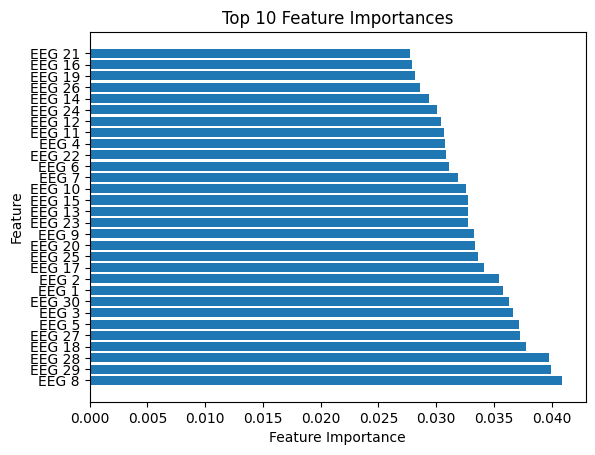

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the data (replace Manipulated_EEG_Data with your actual data)
data = Manipulated_EEG_Data

# Extract features (X) and target variable (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column (substate, binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Get feature importances from the trained model
importances = rfc.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select the top 10 features
num_features = 30
top_indices = indices[:num_features]
top_importances = importances[top_indices]

# Print the top 10 feature rankings
print("Top 10 feature rankings:")
for f in range(num_features):
    print(f"{f+1}. {X_train.columns[indices[f]]}: {importances[indices[f]]}")

# Plot the top 10 feature importances in a horizontal bar chart
plt.barh(range(num_features), top_importances, align="center")
plt.yticks(range(num_features), X_train.columns[top_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.show()


Feature Importance Scores (Information Gain):
Feature: EEG 8 Score: 0.019743206220876885
Feature: EEG 5 Score: 0.014568791553513094
Feature: EEG 10 Score: 0.012989764409306659
Feature: EEG 20 Score: 0.012787424170536354
Feature: EEG 15 Score: 0.012533388243518573
Feature: EEG 29 Score: 0.012110340978535916
Feature: EEG 18 Score: 0.011982703531803196
Feature: EEG 25 Score: 0.011952470661622527
Feature: EEG 4 Score: 0.011615543711267051
Feature: EEG 9 Score: 0.011588751751055781
Feature: EEG 28 Score: 0.01134413139647883
Feature: EEG 14 Score: 0.010769366919490153
Feature: EEG 30 Score: 0.010481369580690014
Feature: EEG 11 Score: 0.010239850865026767
Feature: EEG 16 Score: 0.010038129181300093
Feature: EEG 6 Score: 0.009995678210572123
Feature: EEG 26 Score: 0.009987695977592637
Feature: EEG 19 Score: 0.009625251883841557
Feature: EEG 24 Score: 0.009515187793184054
Feature: EEG 21 Score: 0.00937001536857629
Feature: EEG 13 Score: 0.00884393900403424
Feature: EEG 27 Score: 0.0086727199112

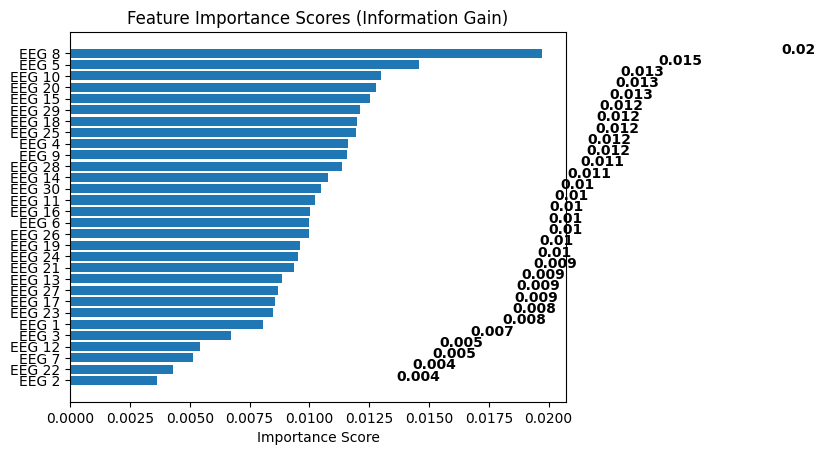

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import matplotlib.pyplot as plt

# Load the data (replace Manipulated_EEG_Data with your actual data)
data = Manipulated_EEG_Data

# Extract features (X) and target variable (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column (substate, binary classification)

# Apply Information Gain
ig = mutual_info_regression(X, y)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(X.columns)):
    feature_scores[X.columns[i]] = ig[i]

# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
print("Feature Importance Scores (Information Gain):")
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)

# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")

plt.show()


Selected Features: ['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8', 'EEG 9', 'EEG 10', 'EEG 11', 'EEG 12', 'EEG 13', 'EEG 14', 'EEG 15', 'EEG 16', 'EEG 17', 'EEG 18', 'EEG 19', 'EEG 20', 'EEG 21', 'EEG 22', 'EEG 23', 'EEG 24', 'EEG 25', 'EEG 26', 'EEG 27', 'EEG 28', 'EEG 29', 'EEG 30']
Accuracy: 0.7049649043724644


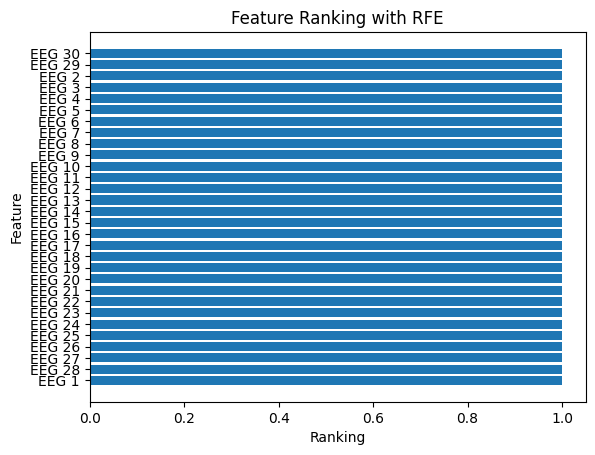

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the data (replace Manipulated_EEG_Data with your actual data)
data = Manipulated_EEG_Data

# Extract features (X) and target variable (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column (substate, binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE
rfe = RFE(model, n_features_to_select=30)

# Fit RFE
fit = rfe.fit(X_train, y_train)

# Print the selected features
selected_features = [col for col, support in zip(X.columns, fit.support_) if support]
print("Selected Features:", selected_features)

# Evaluate the performance of the selected features on the testing set
accuracy = fit.score(X_test, y_test)
print("Accuracy:", accuracy)

# Plot the feature ranking
ranking_df = pd.DataFrame({'Feature': X.columns, 'Ranking': fit.ranking_})
ranking_df = ranking_df.sort_values(by='Ranking')

plt.barh(ranking_df['Feature'], ranking_df['Ranking'])
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.title('Feature Ranking with RFE')
plt.show()


Selected Features: ['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8', 'EEG 9', 'EEG 10', 'EEG 11', 'EEG 12', 'EEG 13', 'EEG 14', 'EEG 15', 'EEG 16', 'EEG 17', 'EEG 18', 'EEG 19', 'EEG 20', 'EEG 21', 'EEG 22', 'EEG 23', 'EEG 24', 'EEG 25', 'EEG 26', 'EEG 27', 'EEG 28', 'EEG 29', 'EEG 30']
Accuracy: 0.7049649043724644


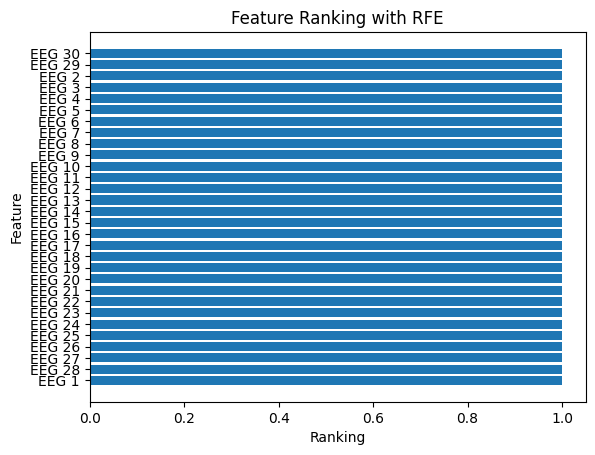

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the data (replace Manipulated_EEG_Data with your actual data)
data = Manipulated_EEG_Data

# Extract features (X) and target variable (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column (substate, binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE
rfe = RFE(model, n_features_to_select=30)

# Fit RFE
fit = rfe.fit(X_train, y_train)

# Print the selected features
selected_features = [col for col, support in zip(X.columns, fit.support_) if support]
print("Selected Features:", selected_features)

# Evaluate the performance of the selected features on the testing set
accuracy = fit.score(X_test, y_test)
print("Accuracy:", accuracy)

# Plot the feature ranking
ranking_df = pd.DataFrame({'Feature': X.columns, 'Ranking': fit.ranking_})
ranking_df = ranking_df.sort_values(by='Ranking')

plt.barh(ranking_df['Feature'], ranking_df['Ranking'])
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.title('Feature Ranking with RFE')
plt.show()


https://www.kdnuggets.com/2021/06/feature-selection-overview.html

Here are several advanced filtering methods suitable for nonlinear EEG signals in Python:

1. Empirical Mode Decomposition (EMD):

Decomposes a signal into intrinsic mode functions (IMFs) that represent nonlinear, non-stationary components.
Captures various signal aspects, including trends, oscillations, and noise.
Python implementation: pyEMD library.
2. Ensemble Empirical Mode Decomposition (EEMD):

Addresses mode mixing issues in EMD by adding white noise to the signal.
Provides more robust and consistent decompositions.
Python implementation: EnsembleEMD library.
3. Wavelet Transform:

Analyzes signals at multiple scales using wavelets.
Effective in isolating non-stationary features and removing artifacts.
Python implementation: PyWavelets library.
4. Adaptive Filters:

Adjust their parameters based on the incoming signal.
Useful for removing artifacts that are time-varying or correlated with the signal.
Python implementation: scipy.signal module (e.g., LMS, RLS filters).
5. Nonlinear Autoregressive (NAR) Models:

Model nonlinear relationships within the signal itself.
Can be used for filtering, prediction, and feature extraction.
Python implementation: statsmodels library.
6. Machine Learning-Based Filters:

Employ techniques like support vector machines, neural networks, or deep learning to learn complex patterns in the signal.
Can be tailored to specific filtering tasks.
Python implementation: scikit-learn, TensorFlow, PyTorch.
Key considerations for choosing a method:

Nature of the nonlinearity in the EEG signal
Specific filtering goals (e.g., artifact removal, feature extraction)
Computational resources and time constraints
Understanding of the underlying assumptions and limitations of each method
Additional tips:

Visually inspect the filtered signals to ensure that artifacts have been effectively removed and desired features preserved.
Validate filtering results using appropriate performance metrics.
Consider combining multiple filtering methods for optimal results.
Explore recent research advancements for the most up-to-date techniques.